In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In this exercise, you will use your new knowledge to propose a solution to a real-world scenario.  To succeed, you will need to import data into Python, answer questions using the data, and generate **histograms** and **density plots** to understand patterns in the data.

在本练习中，您将使用新知识针对实际场景提出解决方案。  要取得成功，您需要将数据导入 Python，使用数据回答问题，并生成**histograms**和**density plots**，以了解数据中的模式。

## Scenario

You'll work with a real-world dataset containing information collected from microscopic images of breast cancer tumors, similar to the image below.

您将使用一个真实世界的数据集，该数据集包含从乳腺癌肿瘤显微图像中收集的信息，与下图类似。

![ex4_cancer_image](https://storage.googleapis.com/kaggle-media/learn/images/qUESsJe.png)

Each tumor has been labeled as either [**benign**](https://en.wikipedia.org/wiki/Benign_tumor) (_noncancerous_) or **malignant** (_cancerous_).

每个肿瘤都被标记为[**良性**](https://en.wikipedia.org/wiki/Benign_tumor)（_noncancerous_）或**恶性**（_cancerous_）。

To learn more about how this kind of data is used to create intelligent algorithms to classify tumors in medical settings, **watch the short video [at this link](https://www.youtube.com/watch?v=9Mz84cwVmS0)**.

要进一步了解此类数据如何用于创建智能算法，对医疗环境中的肿瘤进行分类，请 **观看[本链接](https://www.youtube.com/watch?v=9Mz84cwVmS0)** 的视频短片。

## Step 1: Load the data

In this step, you will load the data.
- Load the data file into a DataFrame called `cancer_data`.  
- The corresponding filepath is `cancer_filepath`.  
- Use the `"Id"` column to label the rows.

在这一步中，您将加载数据。
- 将数据文件加载到名为`cancer_data`的 DataFrame 中。  
- 相应的文件路径是 `cancer_filepath`。  
- 使用 `"Id"`列来标记行。

In [2]:
# Path of the files to read
cancer_filepath = "./input/cancer.csv"

# Fill in the line below to read the file into a variable cancer_data
cancer_data = pd.read_csv(cancer_filepath, index_col="Id")

## Step 2: Review the data

Use a Python command to print the first 5 rows of the data.

In [3]:
cancer_data.head()

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
Id,,,,,,,,,,,,,,,,,,,,,
8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [4]:
# Fill in the line below: In the first five rows of the data, what is the
# largest value for 'Perimeter (mean)'?
max_perim = 87.46

# Fill in the line below: What is the value for 'Radius (mean)' for the tumor with Id 8510824?
mean_radius = 9.504


## Step 3: Investigating differences

#### Part A

Use the code cell below to create two histograms that show the distribution in values for `'Area (mean)'`, separately for both benign and malignant tumors.  (_To permit easy comparison, create a single figure containing both histograms in the code cell below._)

使用下面的代码单元创建两个直方图，分别显示良性肿瘤和恶性肿瘤的 `'Area (mean)'` 值的分布。  （为了便于比较，请在下面的代码单元格中创建一个包含两个直方图的图表。）

<Axes: xlabel='Area (mean)', ylabel='Count'>

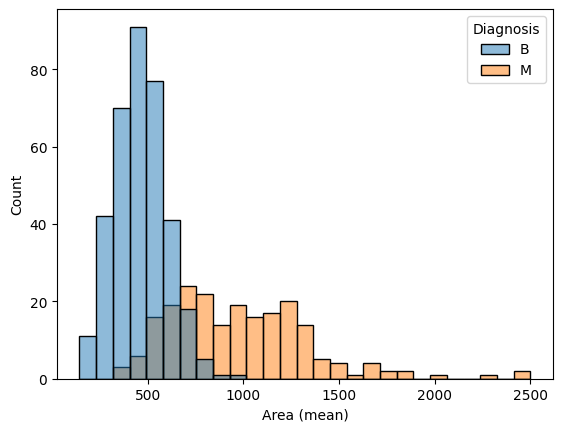

In [5]:
# Histograms for benign and maligant tumors
sns.histplot(data=cancer_data, x="Area (mean)", hue="Diagnosis")

#### Part B

A researcher approaches you for help with identifying how the `'Area (mean)'` column can be used to understand the difference between benign and malignant tumors.  Based on the histograms above, 
- Do malignant tumors have higher or lower values for `'Area (mean)'` (relative to benign tumors), on average?
- Which tumor type seems to have a larger range of potential values?

一位研究人员向您寻求帮助，以确定如何使用`'Area (mean)'`列来了解良性肿瘤和恶性肿瘤的区别。根据上面的直方图，
- 与良性肿瘤相比，恶性肿瘤的`'Area (mean)'`平均值是高还是低？
- 哪种肿瘤类型的潜在值范围更大？

## Step 4: A very useful column

#### Part A

Use the code cell below to create two KDE plots that show the distribution in values for `'Radius (worst)'`, separately for both benign and malignant tumors.  (_To permit easy comparison, create a single figure containing both KDE plots in the code cell below._)

使用下面的代码单元格创建两个 KDE 图，分别显示良性肿瘤和恶性肿瘤的`'Radius (worst)'`值的分布情况。 （为了便于比较，请在下面的代码单元格中创建一个包含两个 KDE 图的图表。）

<Axes: xlabel='Radius (worst)', ylabel='Density'>

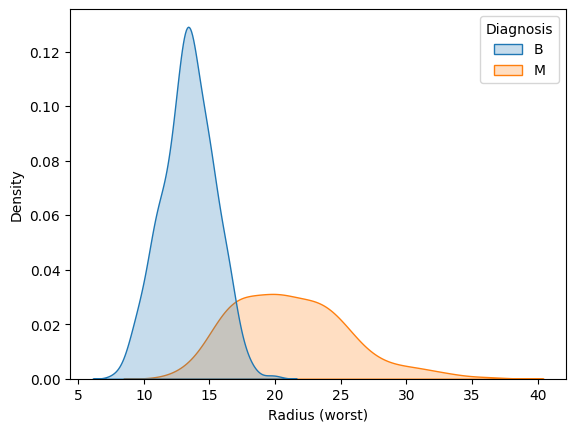

In [6]:
sns.kdeplot(data=cancer_data, x='Radius (worst)', hue='Diagnosis', fill=True)

#### Part B

A hospital has recently started using an algorithm that can diagnose tumors with high accuracy.  Given a tumor with a value for `'Radius (worst)'` of 25, do you think the algorithm is more likely to classify the tumor as benign or malignant?

一家医院最近开始使用一种能够高精度诊断肿瘤的算法。  给定一个肿瘤的`'Radius (worst)'`值为 25，你认为该算法更有可能将该肿瘤归类为良性还是恶性？